### <center>Muhammad Aryan Fathurrahman</center>
#### <center>F1D022069</center>

# Jurnal Modul 4

## Menampilkan CItra asli

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

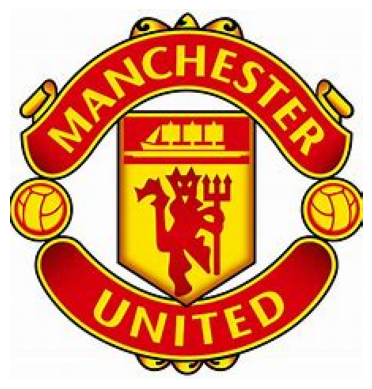

In [110]:
foto = plt.imread("../assets/manchester_united.jpeg")
plt.imshow(foto)
plt.axis("off")
plt.show()

## Menampilkan Citra Grayscale

In [111]:
def bgr2gray(img):
    tinggi, lebar = img.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*img[i][j][0] + 0.5870*img[i][j][1] + 0.1140*img[i][j][2])
            
    return grayImg

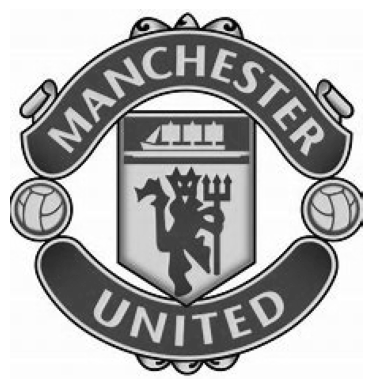

In [112]:
grayImg = bgr2gray(foto)
plt.imshow(grayImg, cmap="gray")
plt.axis("off")
plt.show()
height, width = grayImg.shape
result = np.zeros((height, width), dtype=np.uint8)

## Melakukan Perbaikan Kualitas Citra

In [113]:
kernel1 = np.ones((3, 3), np.float32) / 9
kernel2 = np.ones((9, 9), np.float32) / 81

### Perbaikan dengan Mencari Mean

In [114]:
def mean(image, krnl):
    for i in range(krnl.shape[0]//2, height-krnl.shape[0]//2):
        for j in range(krnl.shape[1]//2, width-krnl.shape[1]//2):
            temp = image[i - krnl.shape[0]//2:i + krnl.shape[0]//2 + 1, j - krnl.shape[0]//2:j + krnl.shape[0]//2 + 1]
            
            sum = 0
            for k in range(krnl.shape[0]):
                for l in range(krnl.shape[1]):
                    sum += krnl[k, l] * temp[k, l]
            result[i, j] = sum
    return result

### Perbaikan dengan Mencari Modus

In [115]:
def modus(image, krnl):
    for i in range(krnl.shape[0]//2, height-krnl.shape[0]//2):
        for j in range(krnl.shape[1]//2, width-krnl.shape[1]//2):
            temp = []
            for k in range(-krnl.shape[0]//2, krnl.shape[0]//2+1):
                for l in range(-krnl.shape[1]//2, krnl.shape[1]//2+1):
                    temp+=[image[i+k][j+l]]
                    
            counts = np.zeros(256)
            for val in temp:
                counts[val] += 1
            max_count = -1
            max_val = -1
            
            for val in range(256):
                count = counts[val]
                if count > max_count:
                    max_count = count
                    max_val = val
            result[i][j] = max_val
    return result

### Perbaikan dengan Mencari Median

In [116]:
def median(image, krnl):
    for i in range(krnl.shape[0]//2, height-krnl.shape[0]//2):
        for j in range(krnl.shape[0]//2, width-krnl.shape[0]//2):
            temp = []
            for k in range(-krnl.shape[0]//2, krnl.shape[0]//2+1):
                for l in range(-krnl.shape[0]//2, krnl.shape[0]//2+1):
                    temp+=[image[i+k][j+l]]
                    
            n = len(temp)
            for p in range(n - 1):
                min_idx = p
                for q in range(p + 1, n):
                    if temp[q] < temp[min_idx]:
                        min_idx = q
                temp_p = temp[p]
                temp[p] = temp[min_idx]
                temp[min_idx] = temp_p
                
            median = temp[krnl.shape[0]**2//2]
            if krnl.shape[0]**2 % 2 == 0:
                median = (temp[krnl.shape[0]**2//2 - 1] + temp[krnl.shape[0]**2//2]) // 2
            else:
                median = temp[krnl.shape[0]**2//2]
            result[i][j] = median

    return result

In [118]:
def apply_kernel(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.zeros((image_height + 2 * pad_height, image_width + 2 * pad_width))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    output_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            output_image[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])

    return output_image

def smoothing(image):
    kernel_smoothing = np.array([[1/10, 1/10, 1/10],
                                [1/10, 1/5, 1/10],
                                [1/10, 1/10, 1/10]])

    smoothed_image = apply_kernel(image, kernel_smoothing)
    return smoothed_image

def sharpening(image):
    kernel_sharpening = np.array([[1/9, 1/9, 1/9],
                                [1/9, 8/9, 1/9],
                                [1/9, 1/9, 1/9]])

    sharpened_image = image - apply_kernel(image, kernel_sharpening)
    return sharpened_image

In [119]:
smoothed_image = smoothing(grayImg)
sharpened_image = sharpening(grayImg)

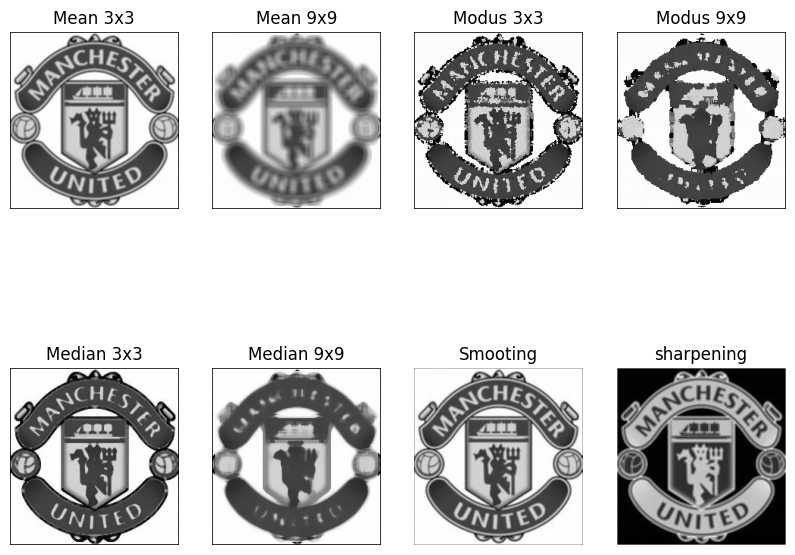

In [120]:
plt.figure(figsize=(10,8))
plt.subplot(2,4,1)
plt.imshow(mean(grayImg, kernel1), cmap="gray")
plt.title("Mean 3x3")
plt.axis("off")
plt.subplot(2,4,2)
plt.imshow(mean(grayImg, kernel2), cmap="gray")
plt.title("Mean 9x9")
plt.axis("off")
plt.subplot(2,4,3)
plt.imshow(modus(grayImg, kernel1), cmap="gray")
plt.title("Modus 3x3")
plt.axis("off")
plt.subplot(2,4,4)
plt.imshow(modus(grayImg, kernel2), cmap="gray")
plt.title("Modus 9x9")
plt.axis("off")
plt.subplot(2,4,5)
plt.imshow(median(grayImg, kernel1), cmap="gray")
plt.title("Median 3x3")
plt.axis("off")
plt.subplot(2,4,6)
plt.imshow(median(grayImg, kernel2), cmap="gray")
plt.title("Median 9x9")
plt.axis("off")
plt.subplot(2,4,7)
plt.imshow(smoothed_image, cmap="gray")
plt.title("Smooting")
plt.axis("off")
plt.subplot(2,4,8)
plt.imshow(sharpened_image, cmap="gray")
plt.title("sharpening")
plt.axis("off")
plt.show()